In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import chess
import chess.svg

In [2]:
chess.__version__

'0.23.9'

In [3]:
board = chess.Board()

In [4]:
jogo = "1"

array_geral = np.load("Jogos/{}/array_geral_{}.npy".format(jogo, jogo))
array_jogadas = np.load("Jogos/{}/array_jogadas_{}.npy".format(jogo, jogo))

In [5]:
def center_image(img, boolean = True, p = 0.35):
    if boolean == False:
        return img
    w, h = img.shape
    cw, ch = w//2, h//2
    #p = 0.4 #max 0.5
    return img[int(cw - w*p): int(cw + w*p), int(ch - h*p) : int(ch + h*p)]

def jogo_ate_i(array_de_jogadas, i = 9999):
    board = chess.Board()
    for jogada in array_de_jogadas[:i]:
        board.push_uci(jogada)
    return board

def converte_notacao_xadrez_afonso(square_number):
    return (63 - square_number)//8, 7 - (63 - square_number)%8

def generate_matrix_board(array_jogadas, i):
    board = jogo_ate_i(array_jogadas, i)
    tabuleiro = np.array([(converte_notacao_xadrez_afonso(i), x.symbol()) for i, x in board.piece_map().items()])
    matrix = np.chararray((8, 8))
    matrix[:] = "_"

    for i, x in tabuleiro:
        matrix[i[0], i[1]] = x
    return matrix

def detect_move(array_jogadas, i):
    prev = generate_matrix_board(array_jogadas, i = i)
    curr = generate_matrix_board(array_jogadas, i = i+1)
    
    np.nonzero(prev != curr)
    return np.nonzero(prev != curr), prev, curr

In [6]:
generate_matrix_board(array_jogadas, i = 0)

chararray([[b'r', b'n', b'b', b'q', b'k', b'b', b'n', b'r'],
           [b'p', b'p', b'p', b'p', b'p', b'p', b'p', b'p'],
           [b'_', b'_', b'_', b'_', b'_', b'_', b'_', b'_'],
           [b'_', b'_', b'_', b'_', b'_', b'_', b'_', b'_'],
           [b'_', b'_', b'_', b'_', b'_', b'_', b'_', b'_'],
           [b'_', b'_', b'_', b'_', b'_', b'_', b'_', b'_'],
           [b'P', b'P', b'P', b'P', b'P', b'P', b'P', b'P'],
           [b'R', b'N', b'B', b'Q', b'K', b'B', b'N', b'R']], dtype='|S1')

In [7]:
def pos_peca_jogada(array_jogadas, i):
    prev = generate_matrix_board(array_jogadas, i = i)
    curr = generate_matrix_board(array_jogadas, i = i+1)
    
    lst = []
    for pos in np.transpose(np.nonzero(prev != curr)):
        if curr[pos[0], pos[1]] != b"_":
            lst.append((curr[pos[0], pos[1]], pos))
    return np.array(lst, dtype = np.object)

# <font color = red> <center> Segmentar de alguma forma antes de jogar pra Rede? Pensar em exatamente qual image/informação jogar para a rede

b'R' [7 5]


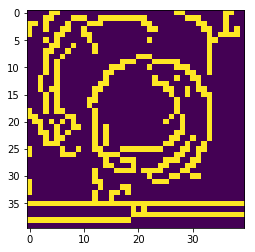

b'K' [7 6]


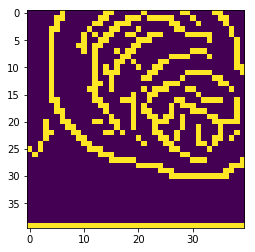

In [8]:
i = 12
for x in pos_peca_jogada(array_jogadas, i):
    label, pos = x
    print(label, pos)
    #plt.imshow(array_geral[i+1][pos[0], pos[1]])
    plt.imshow(center_image(cv2.Canny(array_geral[i+1][pos[0], pos[1]], 0, 25), p = 0.4))
    plt.show()

b'P' [4 3]


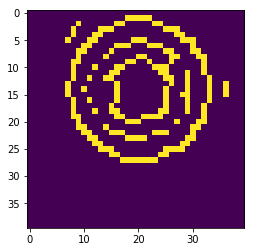

b'n' [2 5]


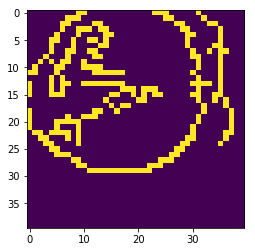

b'P' [4 2]


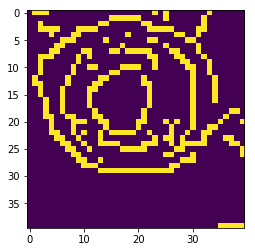

b'p' [2 6]


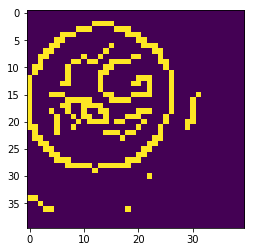

b'N' [5 2]


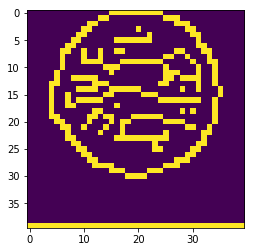

b'b' [1 6]


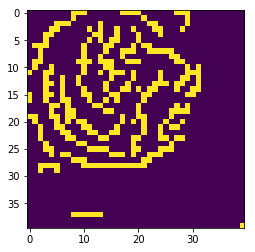

b'P' [4 4]


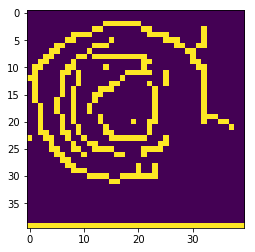

b'p' [2 3]


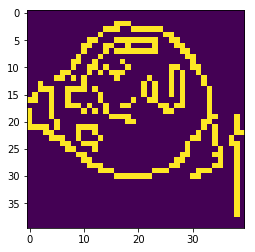

b'N' [5 5]


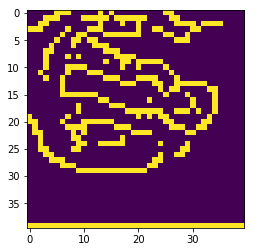

b'r' [0 5]


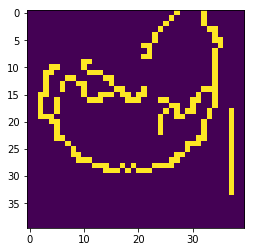

b'k' [0 6]


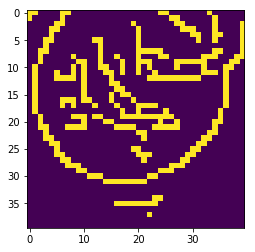

b'B' [6 4]


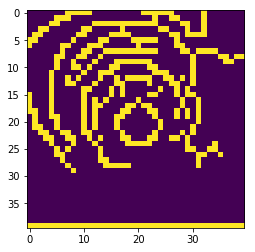

b'p' [3 2]


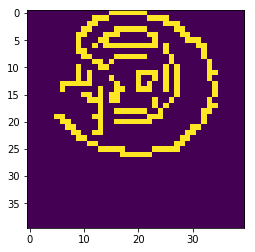

b'R' [7 5]


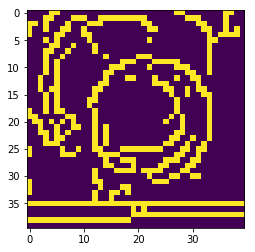

b'K' [7 6]


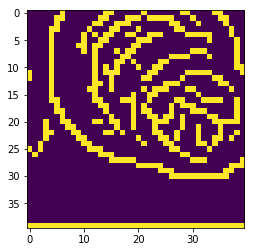

b'b' [4 6]


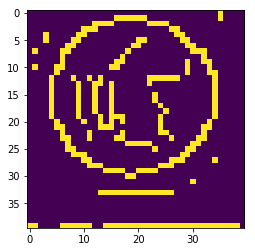

b'P' [3 3]


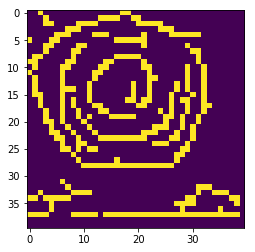

b'n' [1 3]


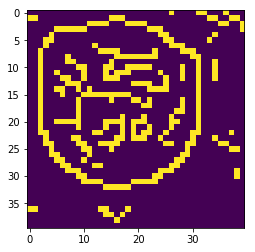

b'B' [3 6]


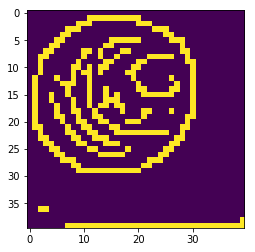

b'p' [2 0]


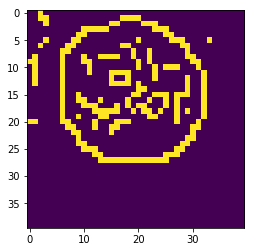

b'P' [4 0]


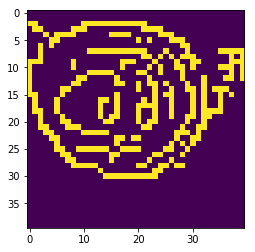

b'q' [1 2]


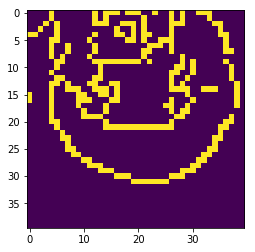

b'Q' [6 3]


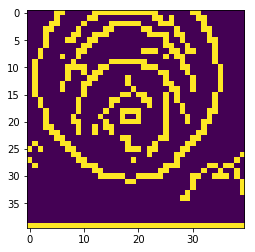

b'r' [0 4]


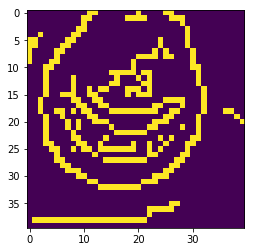

b'P' [5 7]


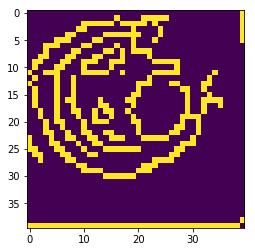

b'b' [5 5]


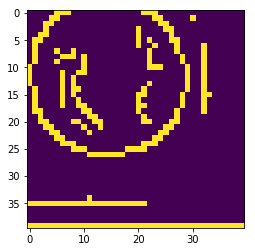

b'B' [5 5]


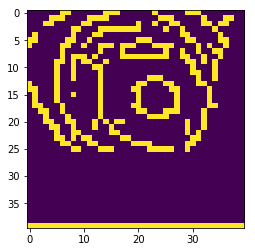

b'p' [2 4]


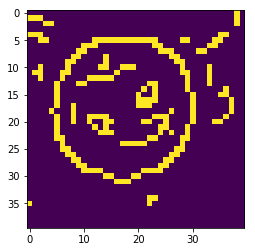

b'P' [5 1]


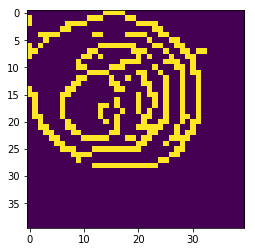

b'k' [0 7]


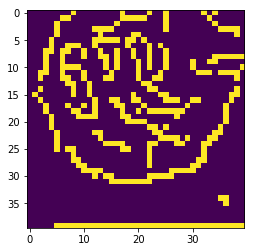

b'B' [5 4]


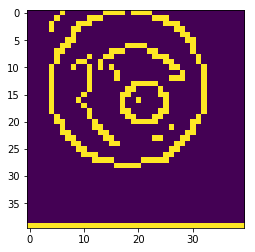

b'n' [0 6]


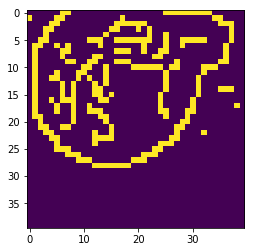

b'B' [6 4]


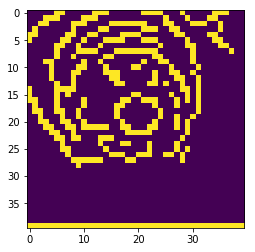

b'p' [3 4]


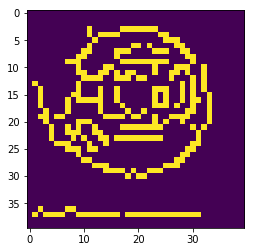

b'P' [4 6]


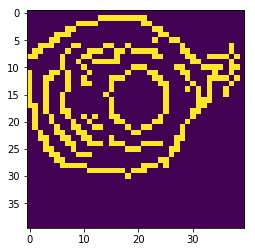

b'q' [0 3]


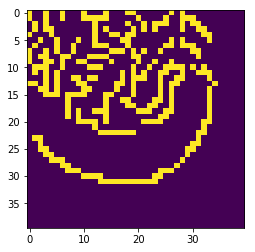

b'K' [6 6]


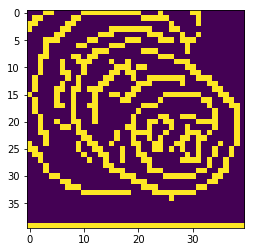

b'q' [4 7]


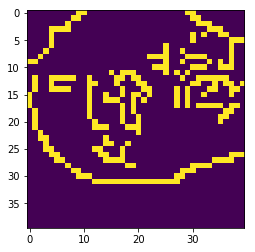

b'P' [5 5]


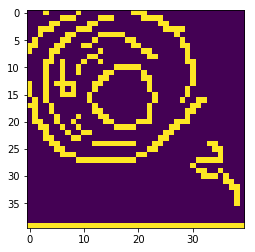

b'b' [2 7]


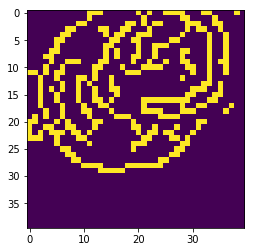

b'P' [3 6]


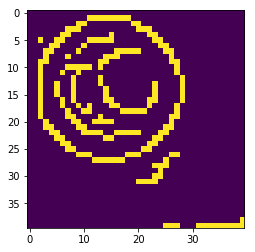

b'b' [1 6]


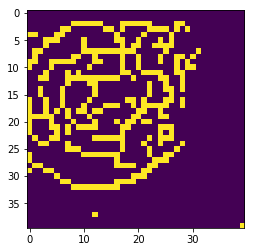

b'B' [6 5]


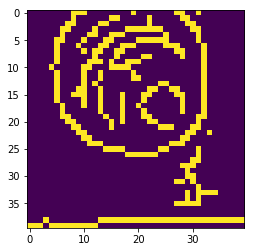

b'q' [4 5]


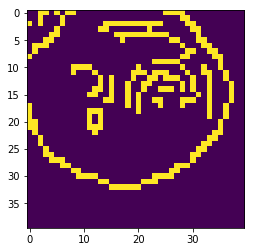

b'B' [5 4]


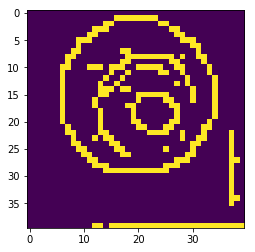

b'q' [4 7]


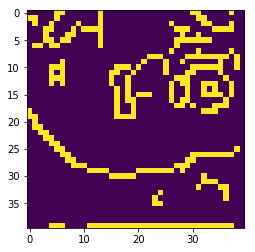

b'Q' [7 4]


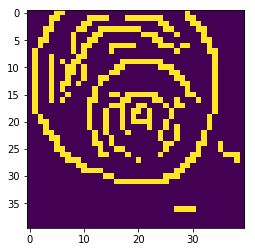

b'q' [7 4]


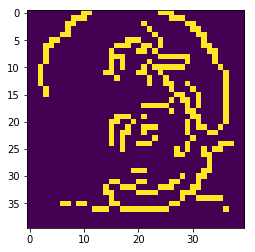

b'R' [7 4]


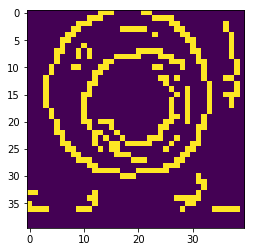

b'p' [2 7]


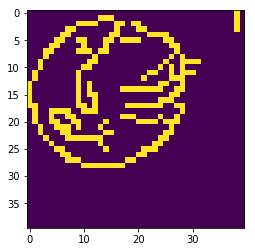

In [9]:
for i in range(len(array_jogadas)):
    for x in pos_peca_jogada(array_jogadas, i):
        label, pos = x
        print(label, pos)
        #plt.imshow(array_geral[i+1][pos[0], pos[1]])
        plt.imshow(center_image(cv2.Canny(array_geral[i+1][pos[0], pos[1]], 0, 20), p = 0.4))
        plt.show()

In [12]:
total = 0
for i in range(len(array_jogadas)):
    for x in pos_peca_jogada(array_jogadas, i):
        label, pos = x
        total += 1
print(total)

50


In [11]:
#as 2 extras são por causa do Roque (Torre e Rei vão para casas diferentes)

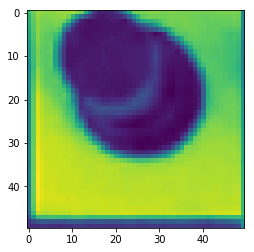

In [13]:
plt.imshow(array_geral[0][0, 0])